## Colding lab 2: 
### You have ￥100. You need ￥1000 by tomorrow morning. Your only way to get it is to gamble. If you bet $k$, you either win $k$ with probability p or lose $k$ with probability $1-p$. 
        
        
#### Maximal strategy: Bet as much as you can, up to what you need, each time. 
#### Minimal strategy: Make a small bet, say 1, each time. 
        
(a) If p = 0.45, which is the better strategy
        
(b) If p = 0.8, which is the better strategy

In [1]:
import random, matplotlib.pyplot as plt, numpy as np, io, os, math
from PIL import Image

# One Monte Carlo simulation of a gambler's ruin problem
def simulate_and_record(strategy, p, max_steps=10000):
    wealth = 100
    trajectory = [wealth]
    steps = 0
    while 0 < wealth < 1000 and steps < max_steps:
        if strategy == "maximal":
            # TODO: bet = ? # implement the maximal strategy 
            bet = min(wealth, 1000 - wealth)  # maximal strategy: bet as much as possible
            pass
        else:
            # TODO: bet = ? # implement the minimal strategy
            bet = 1  # minimal strategy: always bet 1
            pass
   
        if random.random() < p:
            # TODO: wealth = ?
            wealth += bet
            pass
        else:
            # TODO: wealth = ?
            wealth -= bet
            pass
        trajectory.append(wealth)
        steps += 1
    return trajectory, wealth

# Aggregate the results of multiple simulations
def run_simulations(strategy, p, n=1000):
    trajs, finals = [], []
    for _ in range(n):
        t, f = simulate_and_record(strategy, p)
        trajs.append(t)
        finals.append(f)
    return trajs, finals



## Monte Carlo Simulation for four cases & plotting

### 1. p = 0.45, maximum strategy
### 2. p = 0.45, minimum strategy
### 3. p = 0.8, maximum strategy
### 4. p = 0.8, minimum strategy


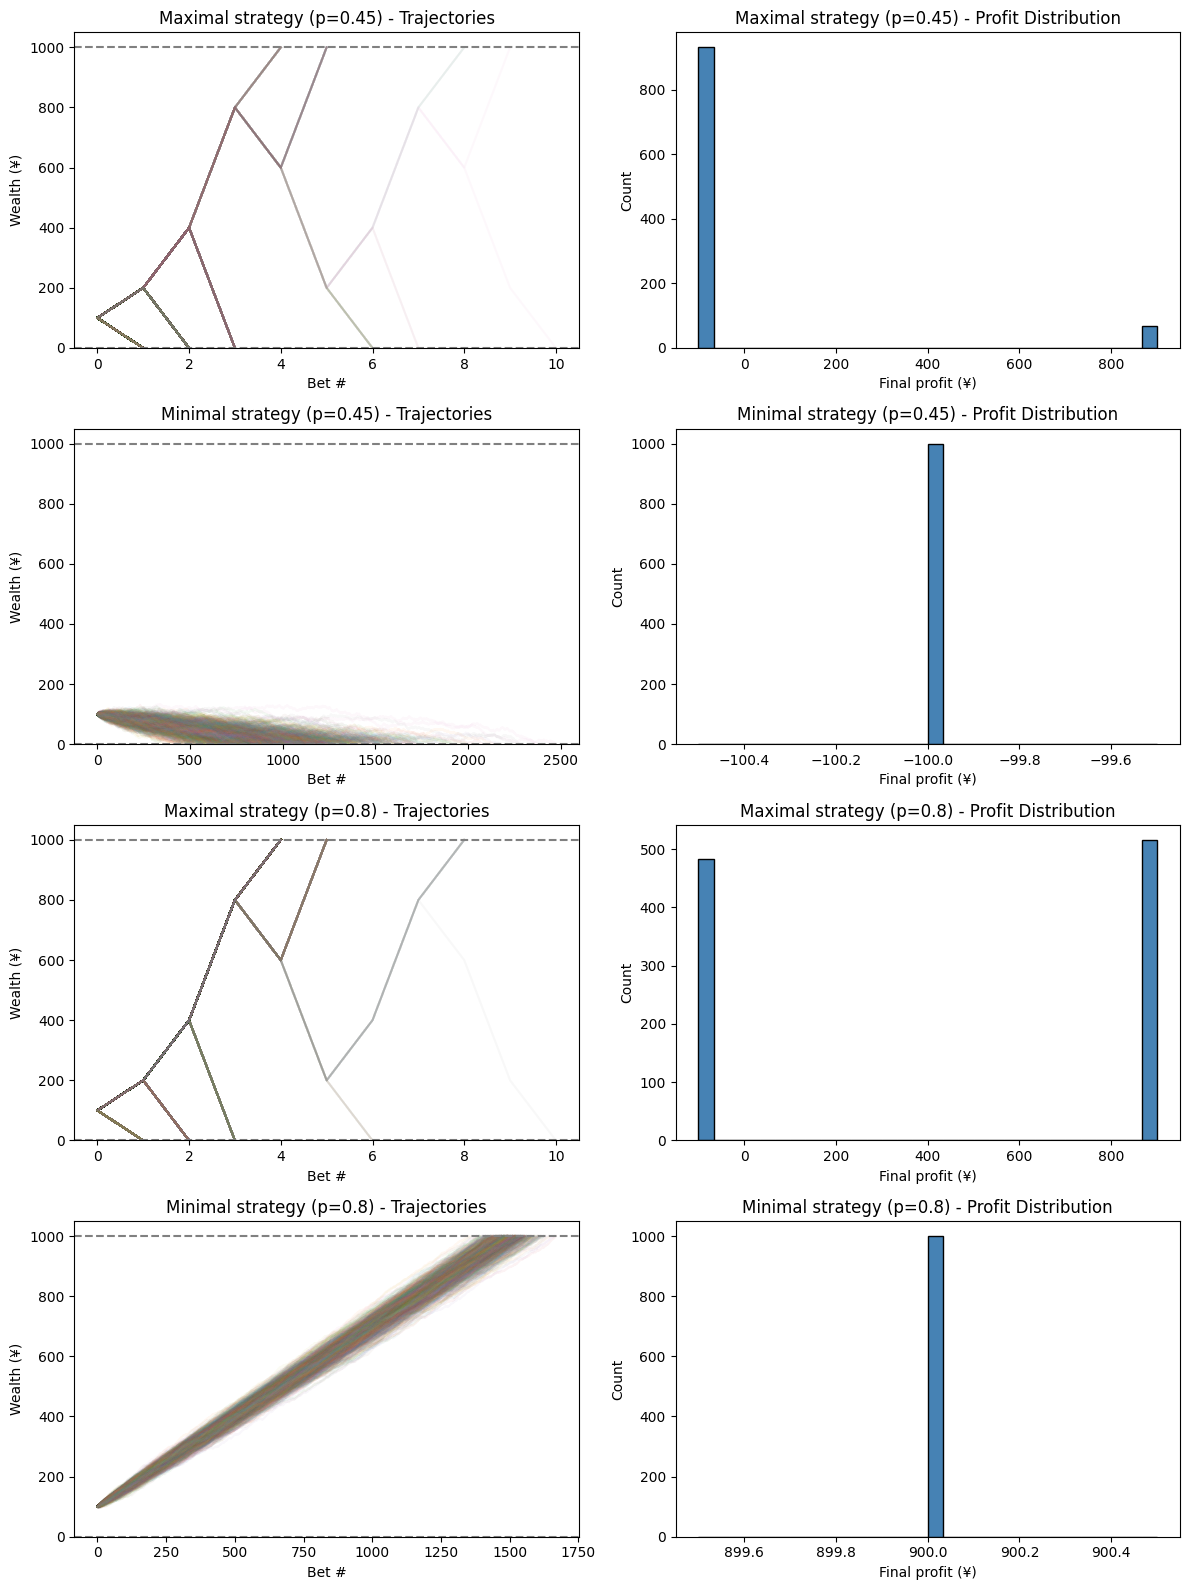

In [ ]:
# Monte Carlo simulation for four cases & plotting
scenarios = [
    ("maximal", 0.45),
    ("minimal", 0.45),
    ("maximal", 0.80),
    ("minimal", 0.80),
]

fig, axs = plt.subplots(4, 2, figsize=(12, 16))
fig.subplots_adjust(hspace=0.4)

for i, (strategy, p) in enumerate(scenarios):
    trajs, finals = run_simulations(strategy, p)
    
    # Trajectories subplot
    ax1 = axs[i, 0]
    for t in trajs:
        ax1.plot(t, alpha=0.05)
    ax1.axhline(1000, linestyle="--", color="gray")
    ax1.axhline(0, linestyle="--", color="gray")
    ax1.set_ylim(0, 1050)
    ax1.set_xlabel("Bet #")
    ax1.set_ylabel("Wealth (¥)")
    ax1.set_title(f"{strategy.capitalize()} strategy (p={p}) - Trajectories")
    
    # Histogram subplot
    ax2 = axs[i, 1]
    profits = np.array(finals) - 100
    ax2.hist(profits, bins=30, color="steelblue", edgecolor="black")
    ax2.set_xlabel("Final profit (¥)")
    ax2.set_ylabel("Count")
    ax2.set_title(f"{strategy.capitalize()} strategy (p={p}) - Profit Distribution")

plt.tight_layout()
plt.savefig("gambler_simulation.png", dpi=500)
plt.show()
